<a href="https://colab.research.google.com/github/KimaniKibuthu/cats-vs-dogs/blob/main/Cats_Vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats Vs Dogs

## Introduction
See whether you can train a deep learning model to differntiate between a cat and a dog.

## Methodology

1. Data Collection
2. Data Preparation
3. Modelling

# Libraries

In [1]:
# General

import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


# Modelling

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
from tensorflow.keras.applications import InceptionV3, ResNet101

In [2]:
def plot_interactive_figures(model_history, metric, all=True, test_data=True):
    """
    Plot the performance metrics of the model


    :param model_history: history

    The model history obtained from model.fit()

    :param metric: str
    The performance metric you want to use.**loss**, **accuracy**

    :param all: bool
    default=True. If true, overrides metric and plots figures of accuracy and loss.
    If false, plots the metric defined.

    :param test_data: bool
    default = True.
    If you have used validation data or not

    :return:
    Performance of the model
    """

    import plotly.graph_objects as go

    if all:
        if test_data:
            acc = model_history.history['accuracy']
            val_acc = model_history.history['val_accuracy']

            loss = model_history.history['loss']
            val_loss = model_history.history['val_loss']
            epochs = list(range(len(acc)+1))
            # Plots
            ax = go.Figure()
            ax.add_trace(go.Scatter(x=epochs, y=val_acc, name='Validation Accuracy',
                                    line=dict(color='yellow', width=4)))
            ax.add_trace(go.Scatter(x=epochs, y=acc, name='Train Accuracy',
                                    line=dict(color='blue', width=4)))
            ax.update_layout(title='Train and Validation Accuracy plots',
                             xaxis_title='Epochs',
                             yaxis_title='Accuracy')
            ax.show()

            bx = go.Figure()
            bx.add_trace(go.Scatter(x=epochs, y=val_loss, name='Validation Loss',
                                    line=dict(color='yellow', width=4)))
            bx.add_trace(go.Scatter(x=epochs, y=loss, name='Train Loss',
                                    line=dict(color='blue', width=4)))
            bx.update_layout(title='Train and Validation Loss plots',
                             xaxis_title='Epochs',
                             yaxis_title='Loss')
            bx.show()

        if not test_data:
            acc = model_history.history['accuracy']
            loss = model_history.history['loss']
            epochs = list(range(len(acc)+1))

            cx = go.Figure()
            cx.add_trace(go.Scatter(x=epochs, y=acc, name='Accuracy',
                                    line=dict(color='blue', width=4)))
            cx.update_layout(title='Accuracy plot',
                             xaxis_title='Epochs',
                             yaxis_title='Accuracy')
            cx.show()

            dx = go.Figure()
            dx.add_trace(go.Scatter(x=epochs, y=loss, name='Loss',
                                    line=dict(color='yellow', width=4)))
            dx.update_layout(title='Loss plot',
                             xaxis_title='Epochs',
                             yaxis_title='Loss')
            dx.show()

    if not all:
        if test_data:
            value_train = model_history.history[metric]
            value_test = model_history.history['val_{}'.format(metric)]
            epochs = list(range(len(value_train)+1))

            ex = go.Figure()
            ex.add_trace(go.Scatter(x=epochs, y=value_test, name='Validation {}'.format(metric),
                                    line=dict(color='yellow', width=4)))
            ex.add_trace(go.Scatter(x=epochs, y=value_train, name='Train {}'.format(metric),
                                    line=dict(color='blue', width=4)))
            ex.update_layout(title='Train and Validation {} plots'.format(metric),
                             xaxis_title='Epochs',
                             yaxis_title='{}'.format(metric))
            ex.show()

        if not test_data:
            value_train = model_history.history[metric]
            epochs = list(range(len(value_train)+1))

            fx = go.Figure()
            fx.add_trace(go.Scatter(x=epochs, y=value_train, name='Train {}'.format(metric),
                                    line=dict(color='blue', width=4)))
            fx.update_layout(title='Train {} plots'.format(metric),
                             xaxis_title='Epochs',
                             yaxis_title='{}'.format(metric))
            fx.show()


# Data Collection

In [3]:
# Kaggle details
os.environ["KAGGLE_USERNAME"] = 'kimanikibuthu'
os.environ["KAGGLE_KEY"] = 'f85c0bb5d43058fddcce7902e1325677'

In [64]:
# Get the data
!kaggle competitions download -c dogs-vs-cats

sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [65]:
!unzip /content/train.zip
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

# Data Preparation

In [6]:
# save cats and dogs differently
sample_cats = []
sample_dogs = []
for root, dir, filename in os.walk('/content/train'):
  for value in filename:
    if value.startswith('cat'):
      sample_cats.append(value)
    else:
      sample_dogs.append(value)

 The length of the cat list is 12500


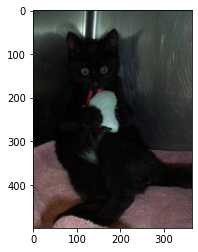

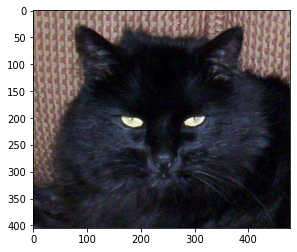

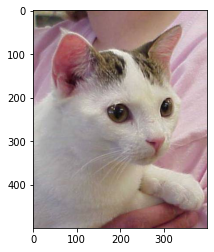

In [7]:
# Check length and print sample
print(f' The length of the cat list is {len(sample_cats)}')

# Get samples
cat_samples = random.sample(sample_cats, 3)

# View images
dir = '/content/train/'

for sample in cat_samples:
  img = mpimg.imread(os.path.join(dir, sample))
  imgplot = plt.imshow(img)
  plt.show()



 The length of the dog list is 12500


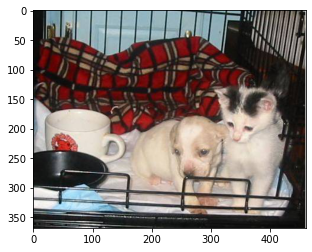

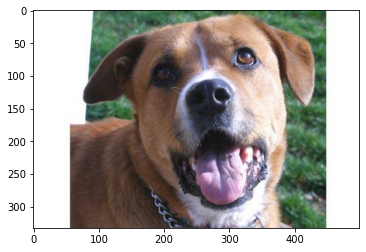

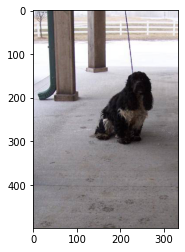

In [8]:
# View some dog
# Check length and print sample
print(f' The length of the dog list is {len(sample_dogs)}')

# Get samples
dog_samples = random.sample(sample_dogs, 3)

# View images
dir = '/content/train/'

for sample in dog_samples:
  img = mpimg.imread(os.path.join(dir, sample))
  imgplot = plt.imshow(img)
  plt.show()

The images contain dogs and cats of various sizes and orientations

In [9]:
# Move cats to a directory on themselves
# cat_dir = os.mkdir(os.path.join(dir, 'cat'))
# dog_dir = os.mkdir(os.path.join(dir, 'dog'))

# # Move
# for sample in sample_cats:
#   shutil.move(os.path.join(dir, sample), cat_dir)

# for sample in sample_dogs:
#   shutil.move(os.path.join(dir, sample), dog_dir)

In [10]:
# Create DataFrame

# cat
cat_labels = np.zeros((12500,1), dtype=int)

cat_df = pd.DataFrame(sample_cats, columns=['directory'])

cat_df['label'] = cat_labels

# Dog
dog_labels = np.ones((12500,1), dtype=int)

dog_df = pd.DataFrame(sample_dogs, columns=['directory'])

dog_df['label'] = dog_labels

# Combine

final_df = pd.concat([cat_df, dog_df])
final_df.reset_index(drop=True, inplace=True)



In [11]:
final_df

,directory,label
0,cat.6398.jpg,0
1,cat.1561.jpg,0
2,cat.7131.jpg,0
3,cat.12180.jpg,0
4,cat.4355.jpg,0
...,...,...
24995,dog.11683.jpg,1
24996,dog.7602.jpg,1
24997,dog.818.jpg,1
24998,dog.1765.jpg,1


**Augment Data Using Image Data Generator**

In [82]:
# Shuffle dataFrame and split it

# Convert label to categorical
final_df['label'] = final_df['label'].astype(str)

# Split data
train, validation = train_test_split(final_df,
                                     train_size=0.9,
                                     random_state=42,
                                     stratify=final_df['label'])



In [83]:
train['label'].value_counts()

0    11250
1    11250
Name: label, dtype: int64

In [84]:
# Instantiate Generators
train_datagen = ImageDataGenerator(rotation_range=30,
                                   brightness_range=(0.1, 1.0),
                                   shear_range=0.1, 
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1/255)

val_datagen = ImageDataGenerator(rescale=1/255)

In [85]:
# Instantiate generator flows

train_flow = train_datagen.flow_from_dataframe(train,
                                        '/content/train', 
                                        x_col='directory',
                                        y_col='label',
                                        target_size=(250, 250), 
                                        class_mode='binary',
                                        batch_size=64)

val_flow = val_datagen.flow_from_dataframe(validation,
                                        '/content/train', 
                                        x_col='directory',
                                        y_col='label',
                                        target_size=(250, 250), 
                                        class_mode='binary',
                                        batch_size=32)


Found 22500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


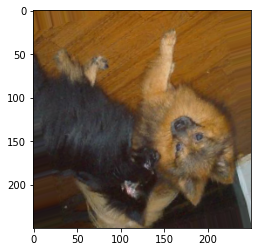

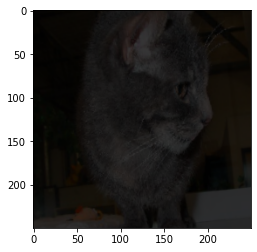

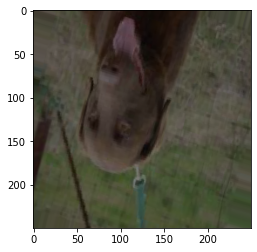

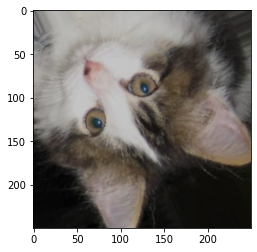

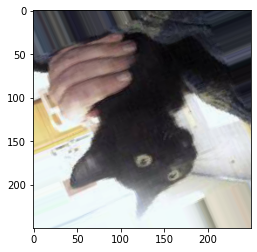

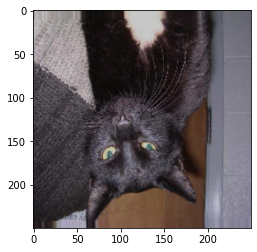

In [15]:
# Visualize images 

x_batch, y_batch = next(train_flow)
for i in range (0,6):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

# Modelling

Use three strategies:
1. Custom CNN model
2. InceptionV3
3. ResNet101 

**Define CallBacks**

In [24]:
# Define callback
early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                 patience=1)

checkpoint_filepath = '/content/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Custom CNN

In [102]:
model = Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the firs
    Conv2D(16, (3,3), activation='relu', input_shape=(250, 250, 3)),
    MaxPool2D((2, 2)),
    # The second convolution
    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    # The third convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    # The fourth convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    # The fifth convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    # Flatten the results to feed into a DNN
    Flatten(),
    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    # Only 1 output neuron. 
    Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [105]:
# Fit model
history = model.fit(train_flow,
                    epochs=15,
                    steps_per_epoch =352,
                    validation_data=val_flow,
                    validation_steps=79,
                    callbacks=[early_stopper, model_checkpoint_callback])

Epoch 1/15
 17/352 [>.............................] - ETA: 5:13 - loss: 0.3794 - accuracy: 0.8327

KeyboardInterrupt: ignored

In [75]:
# Plot history
plot_interactive_figures(history, 'accuracy')

With more epochs, the model would have performed better as the curves have not yet plateaud.

## InceptionV3
 We start off with reusing the model

In [16]:
inception = InceptionV3(include_top=False,
                        weights='imagenet',
                        input_shape=(250,250,3))

inception.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


In [115]:
model = Sequential([
                    inception,
                    Flatten(), 
                    Dense(512, activation='relu'), 
                    Dropout(0.5),
                    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [116]:


# Fit model
history = model.fit(train_flow,
                    epochs=25,
                    steps_per_epoch =352,
                    validation_data=val_flow,
                    validation_steps=79,
                    callbacks=[early_stopper, model_checkpoint_callback])

Epoch 1/25
352/352 [==============================] - 353s 993ms/step - loss: 10.2097 - accuracy: 0.8346 - val_loss: 0.2973 - val_accuracy: 0.9616
Epoch 2/25
352/352 [==============================] - 353s 1s/step - loss: 0.3227 - accuracy: 0.9089 - val_loss: 0.0417 - val_accuracy: 0.9824
Epoch 3/25
352/352 [==============================] - 356s 1s/step - loss: 0.2318 - accuracy: 0.9271 - val_loss: 0.0381 - val_accuracy: 0.9848
Epoch 4/25
352/352 [==============================] - 355s 1s/step - loss: 0.2535 - accuracy: 0.9237 - val_loss: 0.0508 - val_accuracy: 0.9828


In [117]:
# Plot history
plot_interactive_figures(history, 'accuracy')

# Test

**Create Dataframe**


In [97]:
test_df = pd.DataFrame(os.listdir('/content/test1'), columns=['directory'])

**Image Data Generator**

In [98]:
# Test
test_datagen = ImageDataGenerator(rescale=1/255)

# Instantiate flow
test_flow = test_datagen.flow_from_dataframe(
    test_df, 
    "/content/test1", 
    x_col='directory',
    y_col=None,
    class_mode=None,
    target_size=(250,250),
    batch_size=64
)

Found 12500 validated image filenames.


**Predict**

In [111]:
# Load the best model
model.load_weights(checkpoint_filepath)


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7f6156437310> and <tensorflow.python.keras.layers.core.Dropout object at 0x7f61e577cd50>).


In [118]:
# Evaluate model
model.evaluate(val_flow)

79/79 [==============================] - 9s 118ms/step - loss: 0.0508 - accuracy: 0.9828


[0.050754230469465256, 0.9828000068664551]

In [119]:
#  Predict
predictions = model.predict_proba(test_flow)[:, 1]

In [120]:
np.unique(predictions)

array([0])